In [1]:
# 第一步：导入时间序列数据

In [2]:
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
# 读取数据，pd.read_csv默认生成DataFrame对象，需将其转换成Series对象
df = pd.read_csv('TimeSeries_Amount.csv', encoding='utf-8',index_col='ID_DAY')

In [3]:
df.head()

,SUM(F.SLS_AMT)
ID_DAY,
2018/1/1,3977857.132
2018/1/2,1424482.687
2018/1/3,1017166.540
2018/1/4,1423890.223
2018/1/5,2128681.009


In [4]:
df.index

Index(['2018/1/1', '2018/1/2', '2018/1/3', '2018/1/4', '2018/1/5', '2018/1/6',
       '2018/1/7', '2018/1/8', '2018/1/9', '2018/1/10',
       ...
       '2018/6/17', '2018/6/18', '2018/6/19', '2018/6/20', '2018/6/21',
       '2018/6/22', '2018/6/23', '2018/6/24', '2018/6/25', '2018/6/26'],
      dtype='object', name='ID_DAY', length=177)

In [5]:
df.index = pd.to_datetime(df.index)# 将字符串索引转换成时间索引
ts = df['SUM(F.SLS_AMT)']  # 生成pd.Series对象
# 查看数据格式
ts.head()

ID_DAY
2018-01-01    3977857.132
2018-01-02    1424482.687
2018-01-03    1017166.540
2018-01-04    1423890.223
2018-01-05    2128681.009
Name: SUM(F.SLS_AMT), dtype: float64

In [6]:
ts['2018-01-01']

3977857.1319999998

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


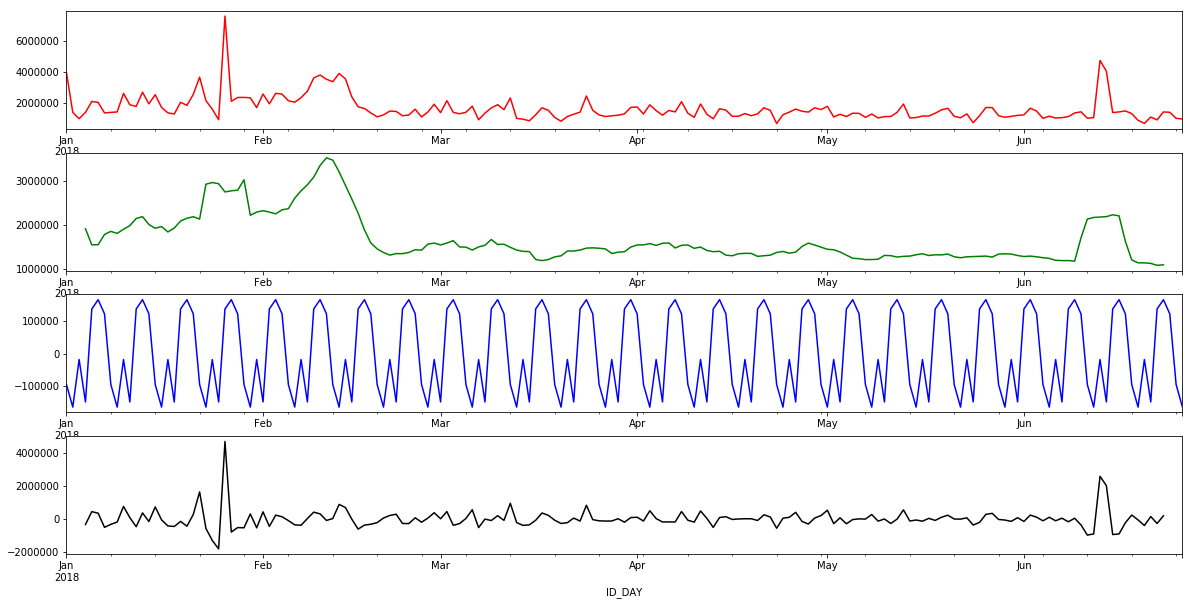

In [8]:
plt.figure(figsize=(20, 10))

plt.subplot(4,1,1)
ts.plot(color='red')

plt.subplot(4,1,2)
trend.plot(color='green',)

plt.subplot(4,1,3)
seasonal.plot(color='blue')

plt.subplot(4,1,4)
residual.plot(color='black')

plt.show()

In [9]:
len(ts)

177

In [10]:
ts['2018-01-26'] = ts['2018-01-25'] 

In [11]:
ts['2018-06-13'] = ts['2018-06-12']

In [12]:
ts['2018-06-14'] = ts['2018-06-15']

In [13]:
# 第二步：进行平稳性检验

In [14]:
# -*- coding:utf-8 -*-

from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white',figsize=(20,10))
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white',figsize=(20,10))
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    print (dftest)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white',figsize=(20,10))
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=7,min_periods=0,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


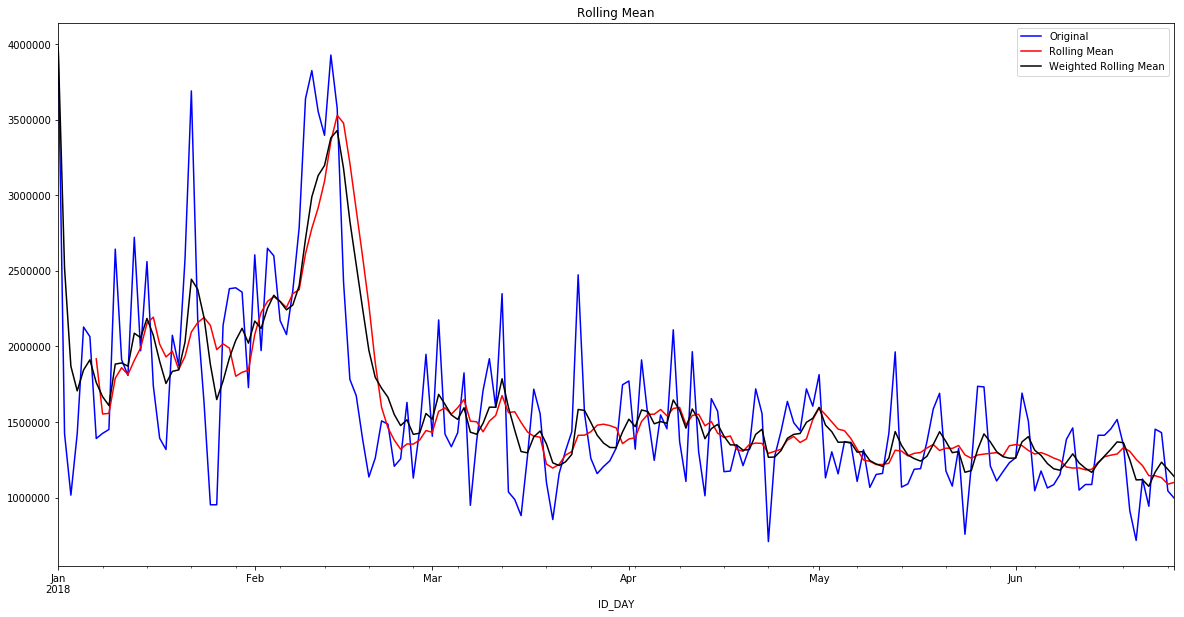

In [15]:
draw_trend(ts, 7)

In [16]:
testStationarity(ts)

(-6.5132395134559316, 1.0871850167644193e-08, 0, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, 4656.2333373122292)


Test Statistic                -6.513240e+00
p-value                        1.087185e-08
#Lags Used                     0.000000e+00
Number of Observations Used    1.760000e+02
Critical Value (1%)           -3.468062e+00
Critical Value (5%)           -2.878106e+00
Critical Value (10%)          -2.575602e+00
dtype: float64

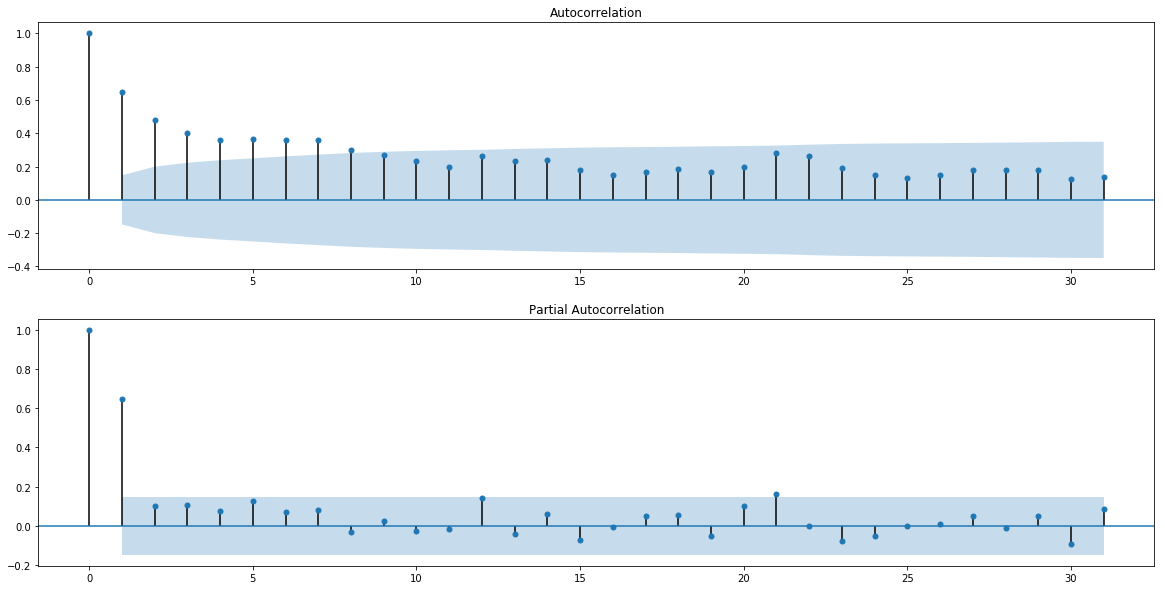

In [17]:
draw_acf_pacf(ts)

In [18]:
# 第三步：平稳性处理（原来的数据就是否平稳？？）

In [19]:
ts_log = np.log(ts)

In [20]:
rol_mean = ts_log.rolling(window=7).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1)

(-5.6212109924060307, 1.1439992303198015e-06, 13, 156, {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5767469641683105}, -570.44830483769715)


Test Statistic                  -5.621211
p-value                          0.000001
#Lags Used                      13.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64

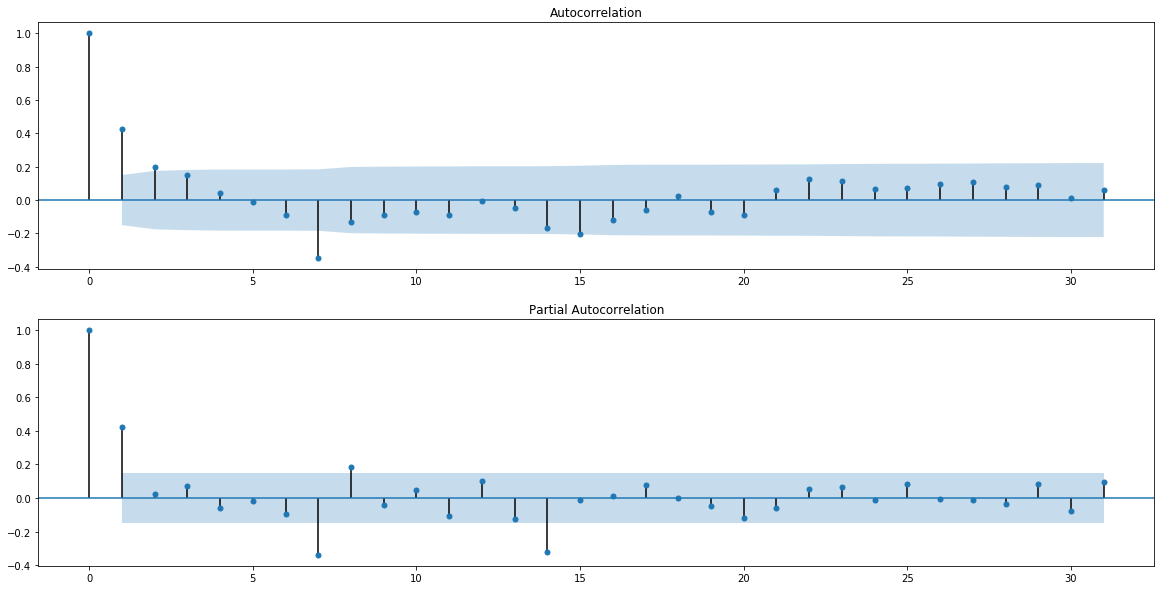

In [21]:
draw_acf_pacf(ts_diff_1)

In [22]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)

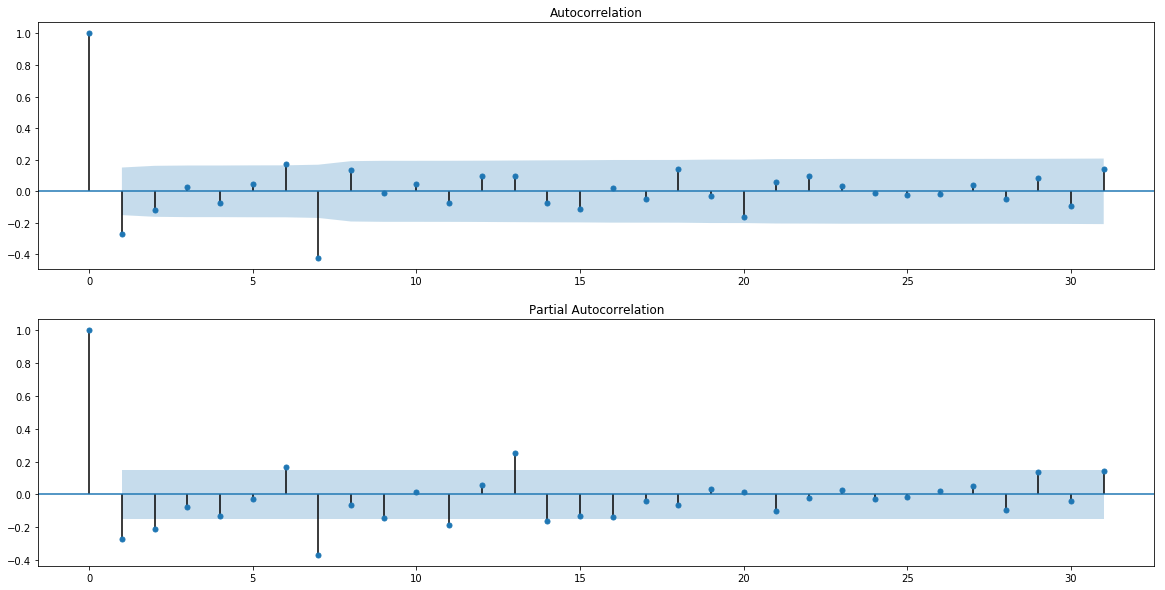

In [23]:
draw_acf_pacf(ts_diff_2)

In [24]:
# 第四步：模式识别

In [25]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(ts_diff_2, order=(1, 1)) 
result_arma = model.fit( disp=-1, method='css')

In [26]:
# 第五步：样本拟合

In [27]:
predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_2.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=6).sum()
rol_recover = diff_recover*7 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

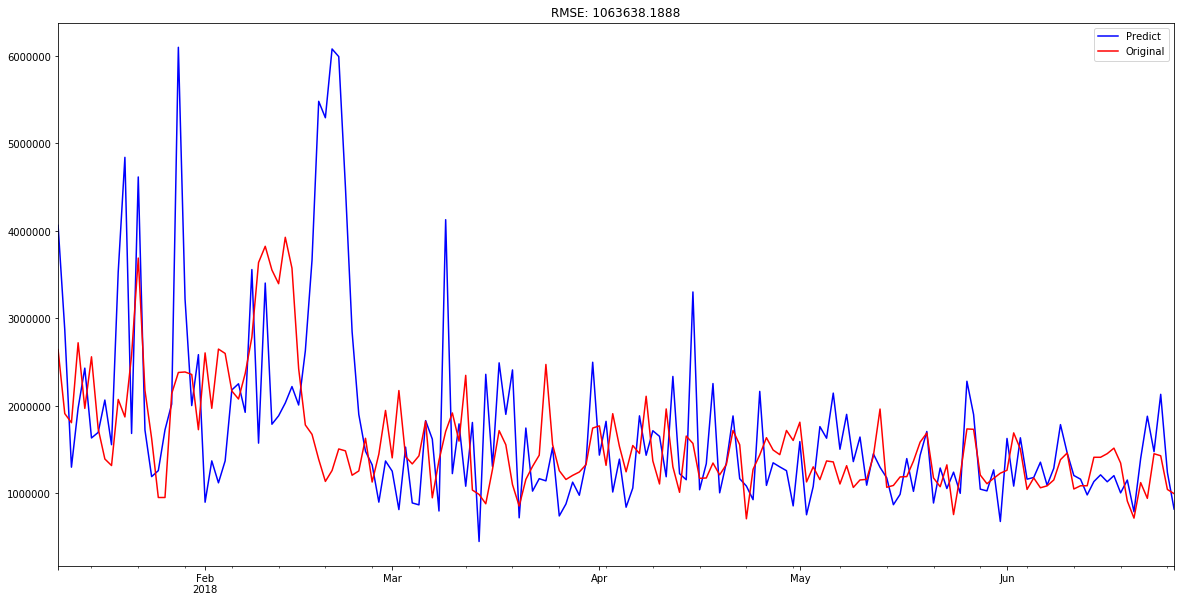

In [28]:
ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white',figsize=(20,10))
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

In [29]:
# 第六步：完善ARIMA

In [30]:
# 差分操作
def diff_ts(ts, d):
    global shift_ts_list
    #  动态预测第二日的值时所需要的差分序列
    global last_data_shift_list
    shift_ts_list = []
    last_data_shift_list = []
    tmp_ts = ts
    for i in d:
        last_data_shift_list.append(tmp_ts[-i])
        print (last_data_shift_list)
        shift_ts = tmp_ts.shift(i)
        shift_ts_list.append(shift_ts)
        tmp_ts = tmp_ts - shift_ts
    tmp_ts.dropna(inplace=True)
    return tmp_ts

# 还原操作
def predict_diff_recover(predict_value, d):
    if isinstance(predict_value, float):
        tmp_data = predict_value
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    elif isinstance(predict_value, np.ndarray):
        tmp_data = predict_value[0]
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    else:
        tmp_data = predict_value
        for i in range(len(d)):
            try:
                tmp_data = tmp_data.add(shift_ts_list[-i-1])
            except:
                raise ValueError('What you input is not pd.Series type!')
        tmp_data.dropna(inplace=True)
    return tmp_data

In [31]:
from arima_model import *
diffed_ts = diff_ts(ts_log, d=[7, 1])
model = arima_model(diffed_ts)
model.certain_model(1, 1)
predict_ts = model.properModel.predict()
diff_recover_ts = predict_diff_recover(predict_ts, d=[7, 1])
log_recover = np.exp(diff_recover_ts)

[13.483771820498522]
[13.483771820498522, 0.087259005680467183]


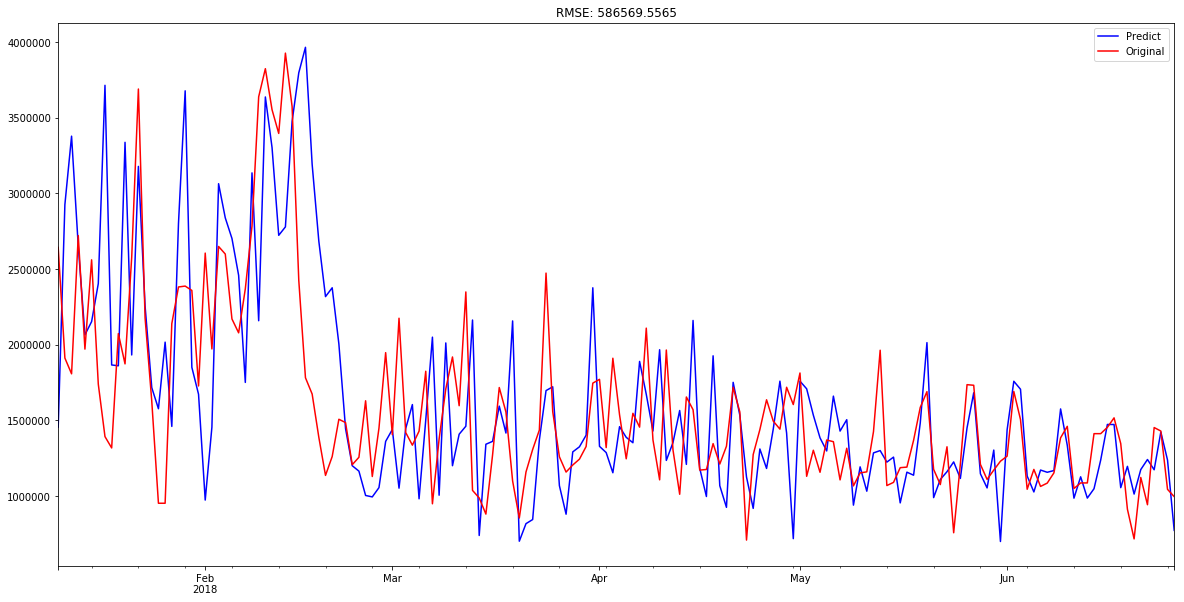

In [32]:
ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white',figsize=(20,10))
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

In [33]:
def proper_model(data_ts, maxLag):
    init_bic = sys.maxsize
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(data_ts, order=(p, q))
            try:
                results_ARMA = model.fit(disp=-1, method='css')
            except:
                continue
            bic = results_ARMA.bic
            if bic < init_bic:
                init_p = p
                init_q = q
                init_properModel = results_ARMA
                init_bic = bic
    return init_bic, init_p, init_q, init_properModel

In [34]:
proper_model(ts_diff_2, 5)

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retval

(-541.09376693187778,
 3,
 1,
 <statsmodels.tsa.arima_model.ARMAResultsWrapper at 0x9e10d68>)

[13.483771820498522]
[13.483771820498522, 0.087259005680467183]


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


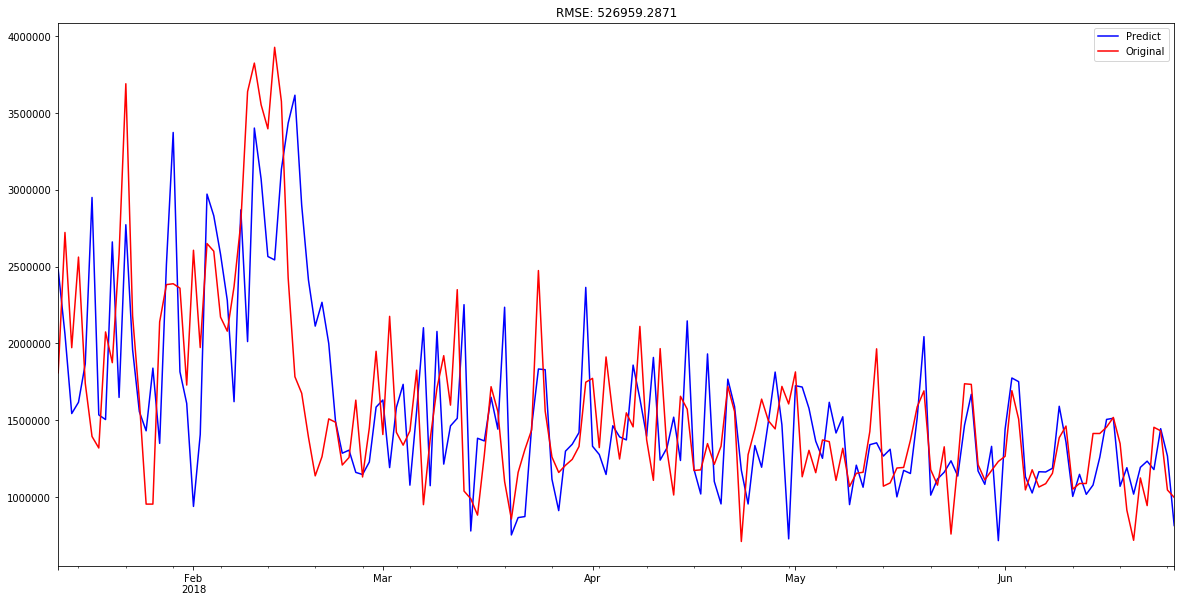

In [35]:
from arima_model import *
diffed_ts = diff_ts(ts_log, d=[7, 1])
model = arima_model(diffed_ts)
model.certain_model(3, 1)
predict_ts = model.properModel.predict()
diff_recover_ts = predict_diff_recover(predict_ts, d=[7, 1])
log_recover = np.exp(diff_recover_ts)
ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white',figsize=(20,10))
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()